<a href="https://colab.research.google.com/github/ariaalinejad/AN2DL-TimeSeriesClassification/blob/main/TimeSeriesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/AN2DL/Homework2

/gdrive/My Drive/AN2DL/Homework2


# Imports

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import warnings
import logging
from keras.utils import normalize

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


# Seed

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Get data

In [ ]:
data_dir = '/gdrive/My Drive/AN2DL/Homework2'
x_train = np.load(data_dir + "/x_train.npy") # If .npy file then a single array is returned
y_train = np.load(data_dir + "/y_train.npy")
x_train.shape, y_train.shape

((2429, 36, 6), (2429,))

# Preprocessing

In [ ]:
x_train_rs = x_train.reshape(2429*36,6)
y_train_rs = np.repeat(y_train, repeats=36, axis=0)

## Initial Plot

[1223, 5651, 15371, 29087, 31319, 36827, 48095, 50543, 54863, 82835, 85607, 87444]
2
2
3


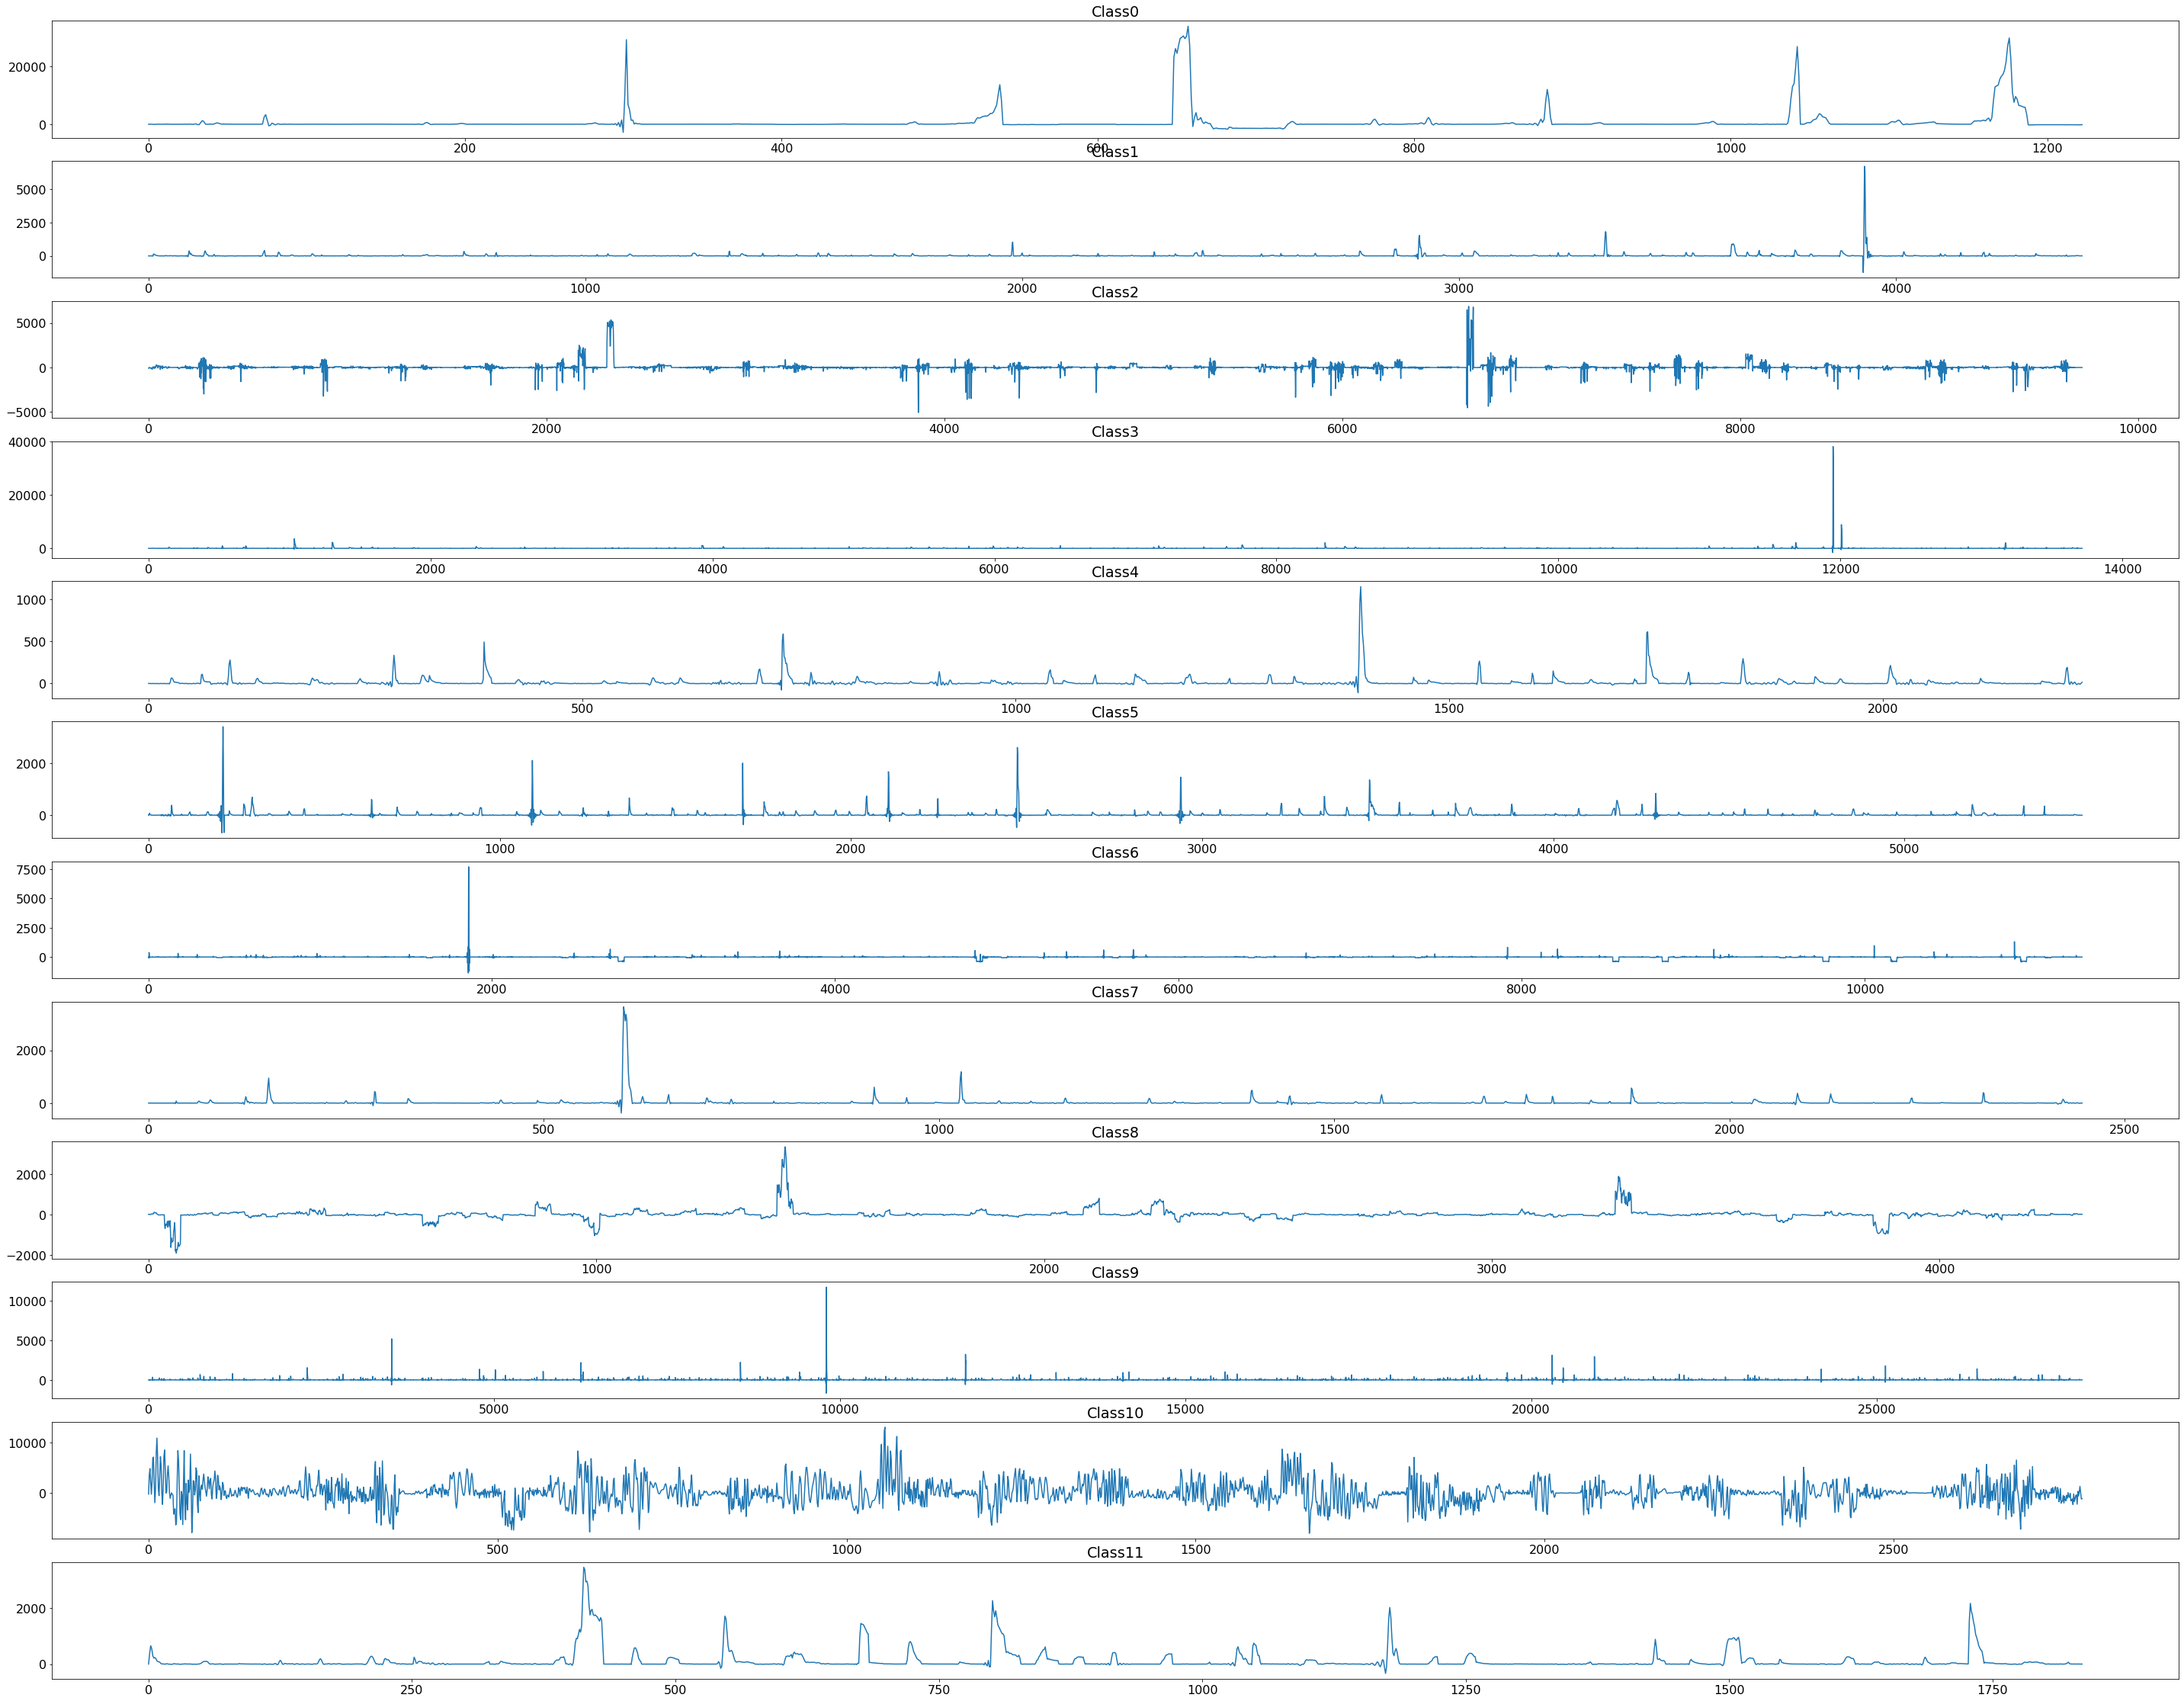

In [ ]:
vec = [0,0,0,0,0,0,0,0,0,0,0, len(y_train_rs)]
j = 0;
for i in range(len(y_train_rs)):
  if(y_train_rs[i] == j+1):
    vec[j] = i-1
  j = y_train_rs[i]


print(vec)

#vector indicates were class changes
print(y_train_rs[vec[2]-1])
print(y_train_rs[vec[2]])
print(y_train_rs[vec[2]+1])



f, ax = plt.subplots(12, figsize=(50,40))
ax[0].plot(x_train_rs[0:vec[0],3])
ax[0].set_title('Class' + str(0))

for i in range(11):
  ax[i+1].plot(x_train_rs[vec[i]+1:vec[i+1],3])
  ax[i+1].set_title('Class' + str(i+1))

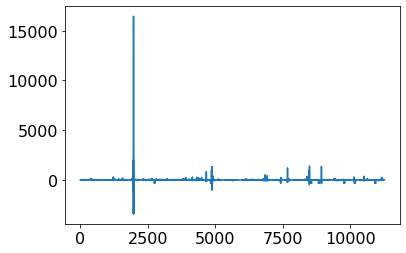

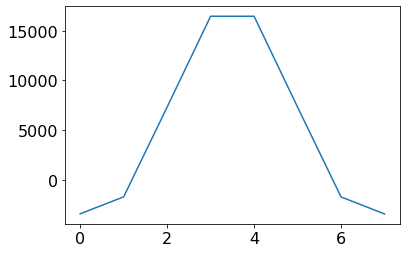

In [ ]:
#Class 6
b = x_train_rs[(vec[5]+1):(vec[5+1]),0]
#b = np.delete(b, b == b.max())
#b = np.delete(b, b == b.max())
#b = np.delete(b, b == b.max())
#b = np.delete(b, b == b.max())
plt.figure(1)
plt.plot(b)
plt.figure(2)
plt.plot(b[1972:1980])
# we see the spike has a width of 5, so median filter should have width og at least 11

## Median

In [ ]:
df_train = pd.DataFrame(data=x_train_rs, index=y_train_rs,columns=["d_0","d_1", "d_2", "d_3", "d_4", "d_5"])

df_train['d_0'] = df_train['d_0'].rolling(10, min_periods=1).median()
df_train['d_1'] = df_train['d_1'].rolling(10, min_periods=1).median()
df_train['d_2'] = df_train['d_2'].rolling(10, min_periods=1).median()
df_train['d_3'] = df_train['d_3'].rolling(10, min_periods=1).median()
df_train['d_4'] = df_train['d_4'].rolling(10, min_periods=1).median()
df_train['d_5'] = df_train['d_5'].rolling(10, min_periods=1).median()

'''for j in range(6):
  for i in range(2429):
    df_train = pd.DataFrame(data=x_train[i,:,j], index=np.repeat(y_train[i],repeats=36, axis=0))
    df_train = df_train.rolling(10).median()
    x_train[i,:,j] = np.array(df_train[0])'''

'for j in range(6):\n  for i in range(2429):\n    df_train = pd.DataFrame(data=x_train[i,:,j], index=np.repeat(y_train[i],repeats=36, axis=0))\n    df_train = df_train.rolling(10).median()\n    x_train[i,:,j] = np.array(df_train[0])'

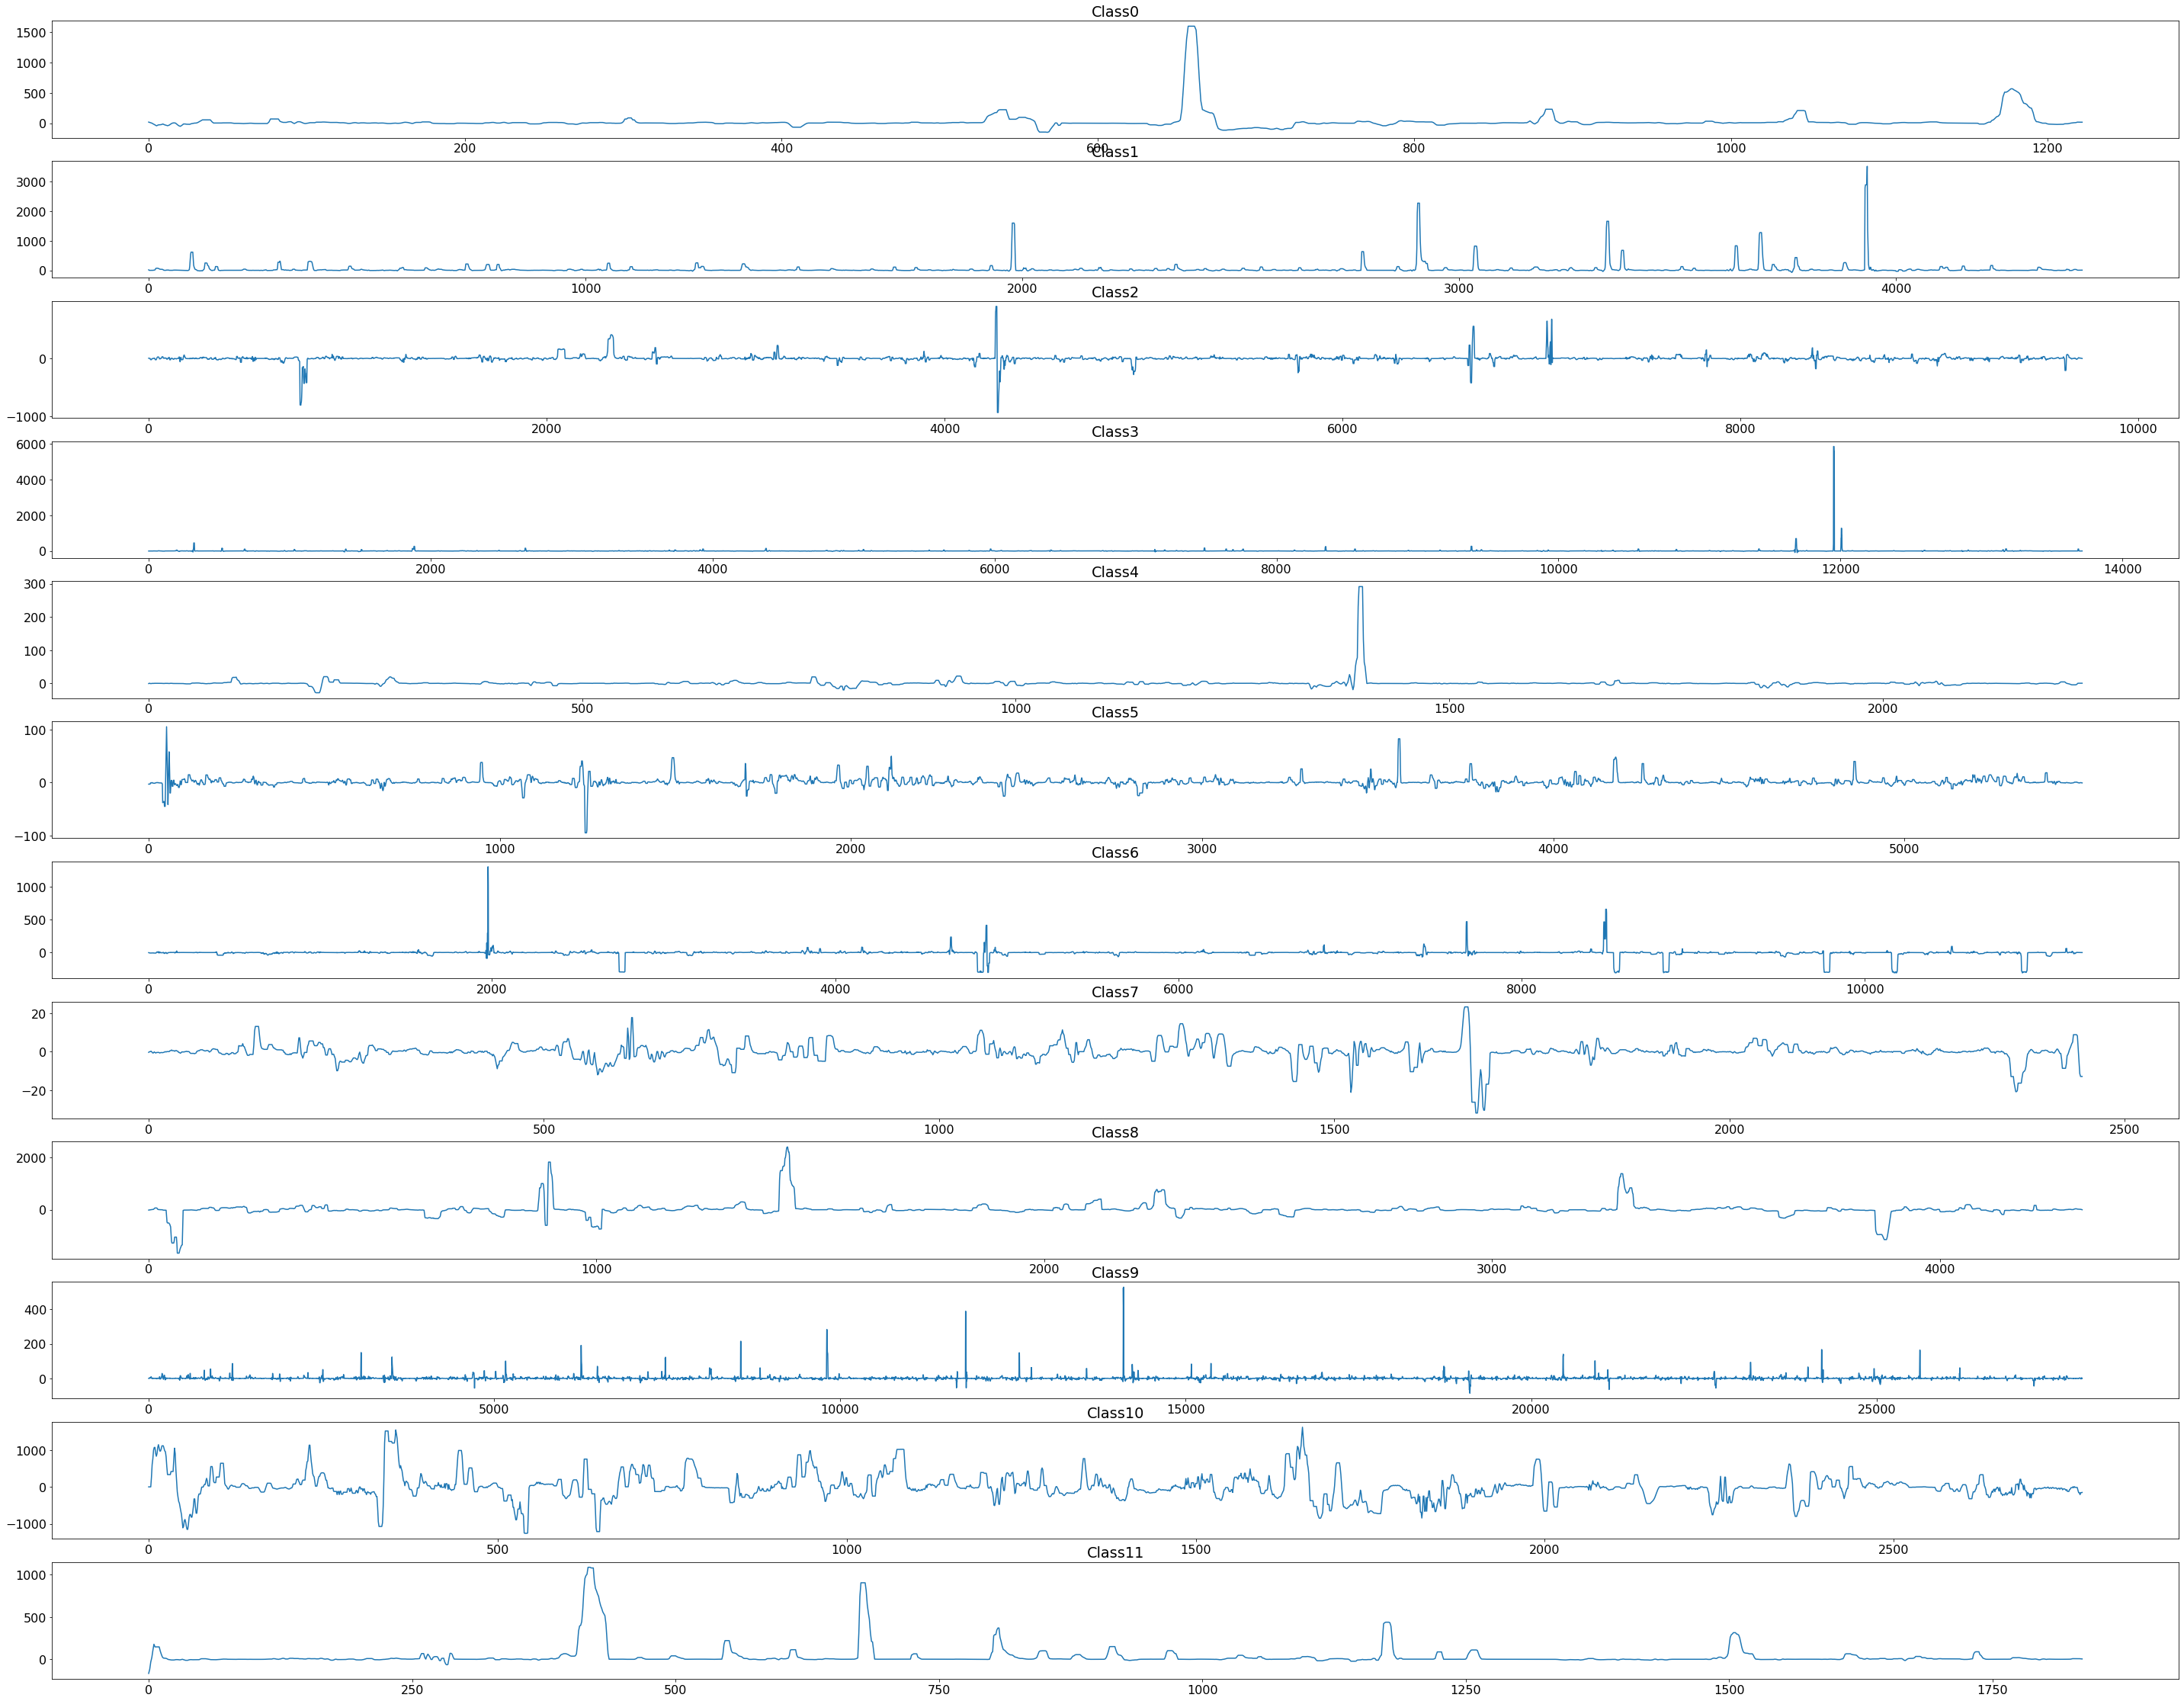

In [ ]:
x_train_noPeak = np.array(df_train['d_0'])

f, ax = plt.subplots(12, figsize=(50,40))
ax[0].plot(x_train_noPeak[0:vec[0]])
ax[0].set_title('Class' + str(0))

#for j in range(6):
j=0
for i in range(11):
  ax[i+1].plot(x_train_noPeak[vec[i]+1:vec[i+1]])
  ax[i+1].set_title('Class' + str(i+1))

In [ ]:
x_train_rs = np.array(df_train)

## LP filter (to remove noise)

In [ ]:
# Didn't work, maybe use hiher cutoff freq?

'''from scipy.signal.signaltools import filtfilt
from scipy import signal

b, a = signal.butter(4, 20000/44100, 'low', analog=False)
for i in range(6):
  x_train_rs[:,i] = signal.filtfilt(b,a, x_train_rs[:,i])'''

"from scipy.signal.signaltools import filtfilt\nfrom scipy import signal\n\nb, a = signal.butter(4, 20000/44100, 'low', analog=False)\nfor i in range(6):\n  x_train_rs[:,i] = signal.filtfilt(b,a, x_train_rs[:,i])"

In [ ]:
'''f, ax = plt.subplots(12, figsize=(50,40))
ax[0].plot(x_train_rs[0:vec[0],3])
ax[0].set_title('Class' + str(0))

for i in range(11):
  ax[i+1].plot(x_train_rs[vec[i]+1:vec[i+1],3])
  ax[i+1].set_title('Class' + str(i+1))'''

"f, ax = plt.subplots(12, figsize=(50,40))\nax[0].plot(x_train_rs[0:vec[0],3])\nax[0].set_title('Class' + str(0))\n\nfor i in range(11):\n  ax[i+1].plot(x_train_rs[vec[i]+1:vec[i+1],3]) \n  ax[i+1].set_title('Class' + str(i+1))"

## Interpolation

In [ ]:
# Interpolation (did not work)

'''import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = np.arange(0, x_train_rs.shape[0])
x_train_rs_interpol = np.empty([174886, 6])
for i in range(6):
  y = x_train_rs[:,i]
  f = interp1d(x, y)
  x_new = np.arange(0, x_train_rs.shape[0]-1, 0.5)
  x_train_rs_interpol[:,i] = f(x_new)'''

'import matplotlib.pyplot as plt\nfrom scipy.interpolate import interp1d\nx = np.arange(0, x_train_rs.shape[0])\nx_train_rs_interpol = np.empty([174886, 6])\nfor i in range(6):\n  y = x_train_rs[:,i]\n  f = interp1d(x, y)\n  x_new = np.arange(0, x_train_rs.shape[0]-1, 0.5)\n  x_train_rs_interpol[:,i] = f(x_new)'

## Zero mean unit var

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train_rs)
x_train_rs = scaler.transform(x_train_rs)

In [ ]:
print(x_train_rs.mean(axis=0))
print(x_train_rs.std(axis=0))

[-3.24303780e-16  7.71340536e-17  8.18226713e-16 -2.38735754e-17
 -5.15637170e-16 -1.48281443e-16]
[1. 1. 1. 1. 1. 1.]


## White noise

In [ ]:
# Add noise (did not work) maybe use lower variance?

'''noise = np.random.normal(0, 0.01, x_train_rs.shape[0])
for i in range(6):
  x_train_rs[:,i] = x_train_rs[:,i] + noise'''

'noise = np.random.normal(0, 0.01, x_train_rs.shape[0])\nfor i in range(6):\n  x_train_rs[:,i] = x_train_rs[:,i] + noise'

In [ ]:
'''f, ax = plt.subplots(12, figsize=(50,40))
ax[0].plot(x_train_rs[0:vec[0],0])
ax[0].set_title('Class' + str(0))

for i in range(11):
  ax[i+1].plot(x_train_rs[vec[i]+1:vec[i+1],0])
  ax[i+1].set_title('Class' + str(i+1))'''

"f, ax = plt.subplots(12, figsize=(50,40))\nax[0].plot(x_train_rs[0:vec[0],0])\nax[0].set_title('Class' + str(0))\n\nfor i in range(11):\n  ax[i+1].plot(x_train_rs[vec[i]+1:vec[i+1],0]) \n  ax[i+1].set_title('Class' + str(i+1))"

## Other

In [ ]:
x_train = x_train_rs.reshape(2429,36,6)

In [ ]:
from sklearn.model_selection import train_test_split




x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, shuffle=True)

In [ ]:
# Shuffle
#idx = np.random.permutation(len(y_train))
#x_train,y_train = x_train[idx], y_train[idx]

## Convert from sparse labels to categorical

In [ ]:
#y_train = tfk.utils.to_categorical(y_train, num_classes=12)
y_train = tfk.utils.to_categorical(y_train, num_classes=12)
y_val = tfk.utils.to_categorical(y_val, num_classes=12)

# Models:

In [ ]:
input_shape = x_train.shape[1:]
classes = 12
batch_size = 64
epochs = 200

## Vanilla Long Short Term Memory (LSTM) Neural Network

![](https://drive.google.com/uc?export=view&id=1FZ_P4SgVAA_mCZQ0tK18VwRqGqzNANOE
)

In [ ]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_LSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 36, 128)           69120     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 12)                1548      
                                                                 
Total params: 218,764
Trainable params: 218,764
Non-trainable

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
35/35 [==============================] - 11s 196ms/step - loss: 2.0195 - accuracy: 0.3330 - val_loss: 1.5426 - val_accuracy: 0.4815 - lr: 0.0010
Epoch 2/200
35/35 [==============================] - 6s 164ms/step - loss: 1.5508 - accuracy: 0.4652 - val_loss: 1.3040 - val_accuracy: 0.5144 - lr: 0.0010
Epoch 3/200
35/35 [==============================] - 6s 162ms/step - loss: 1.3920 - accuracy: 0.5096 - val_loss: 1.2625 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 4/200
35/35 [==============================] - 6s 165ms/step - loss: 1.2962 - accuracy: 0.5471 - val_loss: 1.2309 - val_accuracy: 0.5844 - lr: 0.0010
Epoch 5/200
35/35 [==============================] - 6s 164ms/step - loss: 1.2013 - accuracy: 0.5787 - val_loss: 1.2258 - val_accuracy: 0.6173 - lr: 0.0010
Epoch 6/200
35/35 [==============================] - 6s 162ms/step - loss: 1.1322 - accuracy: 0.6002 - val_loss: 1.1332 - val_accuracy: 0.6420 - lr: 0.0010
Epoch 7/200
35/35 [==============================] - 6s 166ms/s

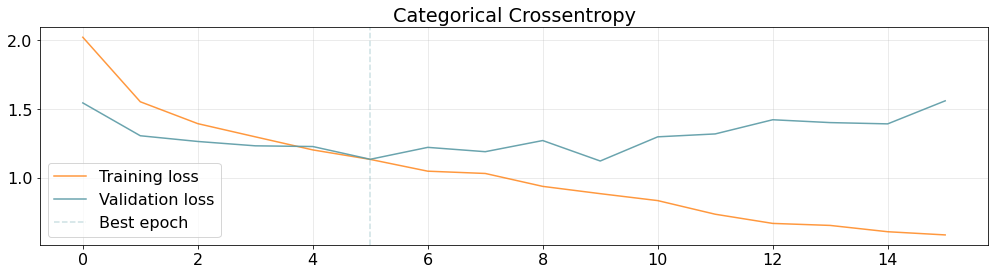

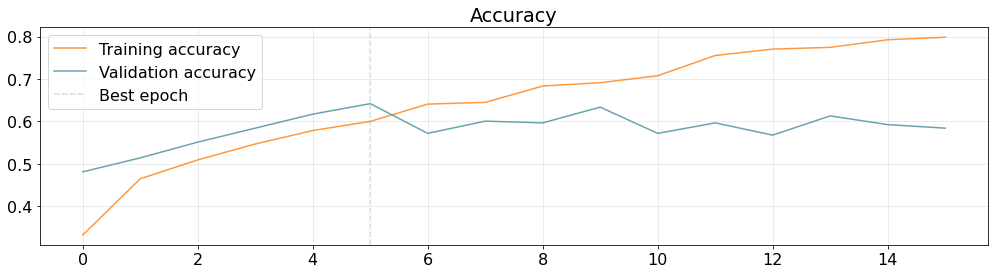

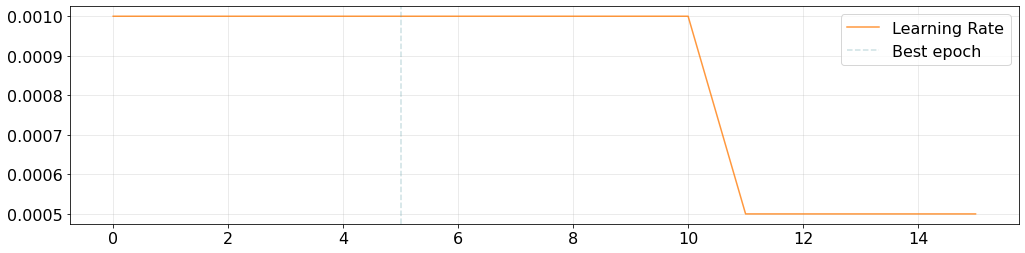

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('LSTM')
# model = tfk.models.load_model('LSTM')

## Bidirectional Long Short Term Memory (BiLSTM) Neural Network

![](https://drive.google.com/uc?export=view&id=1CN-jJqzb5AurhnMMiuvdVCaPGy2KReLc
)

In [ ]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 36, 256)          138240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 12)                1548  

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
35/35 [==============================] - 16s 301ms/step - loss: 2.1257 - accuracy: 0.3234 - val_loss: 1.7783 - val_accuracy: 0.4239 - lr: 0.0010
Epoch 2/200
35/35 [==============================] - 8s 233ms/step - loss: 1.8030 - accuracy: 0.3884 - val_loss: 1.5383 - val_accuracy: 0.4774 - lr: 0.0010
Epoch 3/200
35/35 [==============================] - 8s 234ms/step - loss: 1.6651 - accuracy: 0.4213 - val_loss: 1.5563 - val_accuracy: 0.4774 - lr: 0.0010
Epoch 4/200
35/35 [==============================] - 8s 232ms/step - loss: 1.6446 - accuracy: 0.4300 - val_loss: 1.5052 - val_accuracy: 0.5226 - lr: 0.0010
Epoch 5/200
35/35 [==============================] - 8s 232ms/step - loss: 1.5844 - accuracy: 0.4410 - val_loss: 1.3782 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 6/200
35/35 [==============================] - 8s 232ms/step - loss: 1.5126 - accuracy: 0.4675 - val_loss: 1.3867 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 7/200
35/35 [==============================] - 8s 234ms/s

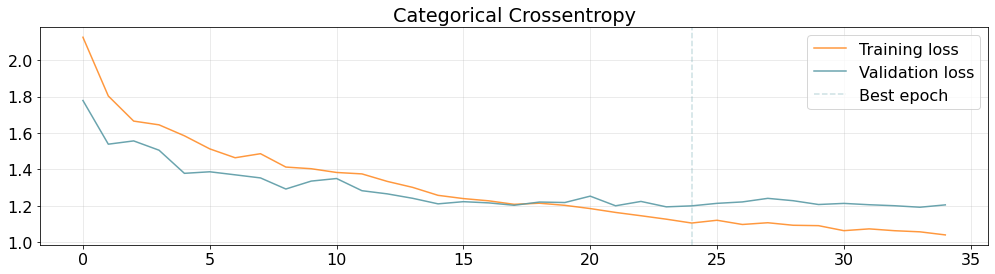

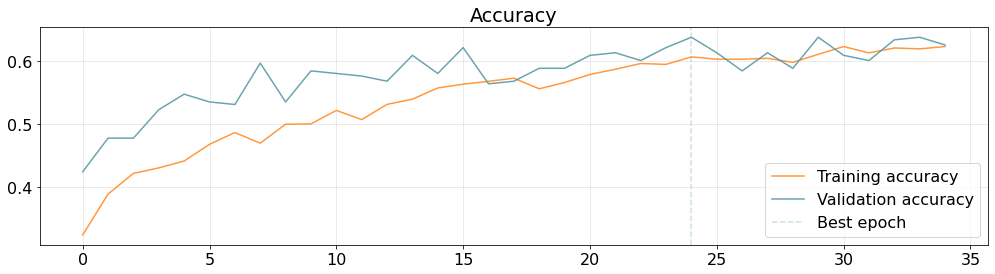

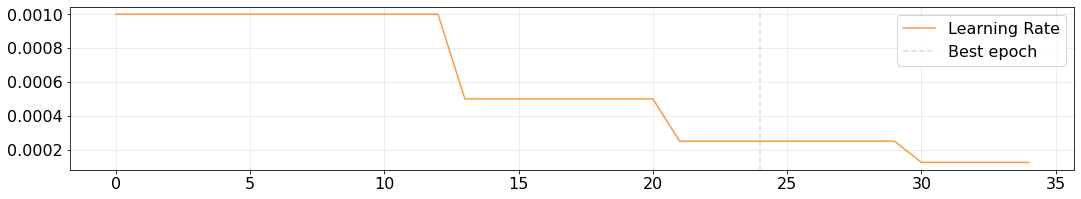

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('BiLSTM')
# model = tfk.models.load_model('BiLSTM')

## 1D Convolutional NN:

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_1DCNN_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 36, 128)           2432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 128)           49280     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0     

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_split=.1,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
35/35 [==============================] - 1s 18ms/step - loss: 2.3337 - accuracy: 0.3262 - val_loss: 1.9594 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 2/200
35/35 [==============================] - 0s 13ms/step - loss: 1.9845 - accuracy: 0.3541 - val_loss: 1.7798 - val_accuracy: 0.4115 - lr: 0.0010
Epoch 3/200
35/35 [==============================] - 0s 13ms/step - loss: 1.8645 - accuracy: 0.3797 - val_loss: 1.7105 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 4/200
35/35 [==============================] - 0s 13ms/step - loss: 1.8075 - accuracy: 0.3952 - val_loss: 1.6201 - val_accuracy: 0.4486 - lr: 0.0010
Epoch 5/200
35/35 [==============================] - 0s 12ms/step - loss: 1.7595 - accuracy: 0.4209 - val_loss: 1.5879 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 6/200
35/35 [==============================] - 0s 13ms/step - loss: 1.7113 - accuracy: 0.4277 - val_loss: 1.5394 - val_accuracy: 0.4774 - lr: 0.0010
Epoch 7/200
35/35 [==============================] - 0s 12ms/step - lo

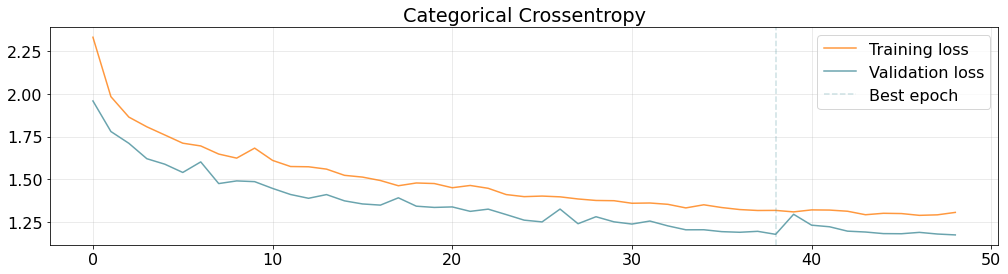

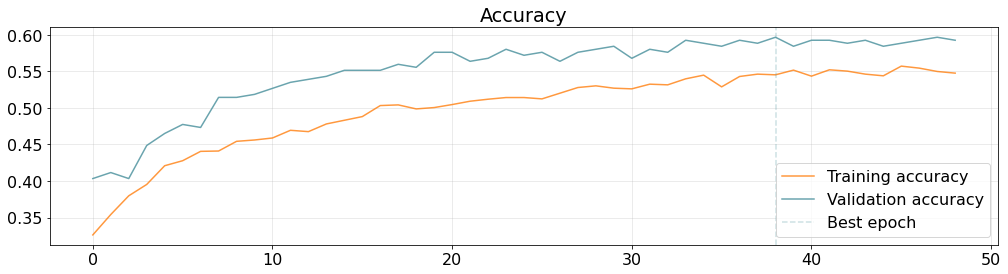

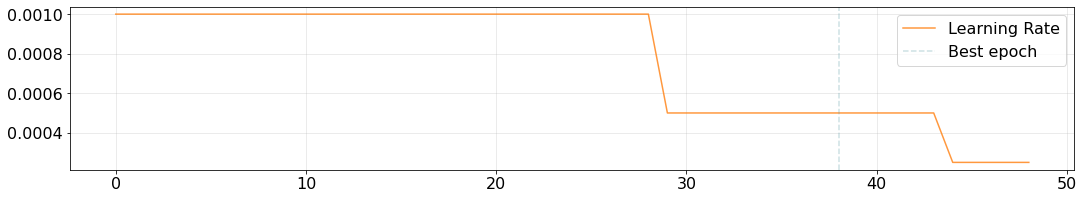

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('1DCNN')
# model = tfk.models.load_model('1DCNN')

## Resnet based cnn

In [ ]:
from tensorflow.keras import regularizers
#Forsøk nr2

def build_1DResnetLike_classifier(input_shape, classes):
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)

    dropout = tfkl.Dropout(.5, seed=seed)(lstm)


    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-2),
    activity_regularizer=regularizers.L2(1e-3))(input_layer)

    cnn = tfkl.Conv1D(256,3,padding='same',activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-2),
    activity_regularizer=regularizers.L2(1e-3))(cnn)

    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-2),
    activity_regularizer=regularizers.L2(1e-3))(cnn)

    gap = tfkl.GlobalAveragePooling1D()(cnn)

    concatted = tf.keras.layers.Concatenate()([gap, dropout])

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(concatted)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_1DResnetLike_classifier(input_shape, classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 36, 6)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 36, 128)      2432        ['Input[0][0]']                  
                                                                                                  
 conv1d_1 (Conv1D)              (None, 36, 256)      98560       ['conv1d[0][0]']                 
                                                                                                  
 lstm_2 (LSTM)                  (None, 36, 128)      69120       ['Input[0][0]']                  
                                                                                              

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

tl_checkpoint_1 = ModelCheckpoint(filepath='/gdrive/My Drive/AN2DL/Homework2/tl_model_v0.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy',
                                  mode='max',
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=4, factor=0.7, min_lr=1e-5)


In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_val, y_val),
    callbacks = [tl_checkpoint_1,early_stop,reduceLR]
).history

Epoch 1/200
35/35 [==============================] - ETA: 0s - loss: 2.4275 - accuracy: 0.3303
Epoch 1: val_accuracy improved from -inf to 0.34979, saving model to /gdrive/My Drive/AN2DL/Homework2/tl_model_v0.weights.best.hdf5
35/35 [==============================] - 14s 265ms/step - loss: 2.4275 - accuracy: 0.3303 - val_loss: 2.0491 - val_accuracy: 0.3498 - lr: 0.0010
Epoch 2/200
35/35 [==============================] - ETA: 0s - loss: 2.0443 - accuracy: 0.3747
Epoch 2: val_accuracy improved from 0.34979 to 0.39506, saving model to /gdrive/My Drive/AN2DL/Homework2/tl_model_v0.weights.best.hdf5
35/35 [==============================] - 8s 228ms/step - loss: 2.0443 - accuracy: 0.3747 - val_loss: 1.8002 - val_accuracy: 0.3951 - lr: 0.0010
Epoch 3/200
35/35 [==============================] - ETA: 0s - loss: 1.8618 - accuracy: 0.4044
Epoch 3: val_accuracy improved from 0.39506 to 0.43210, saving model to /gdrive/My Drive/AN2DL/Homework2/tl_model_v0.weights.best.hdf5
35/35 [=================

In [ ]:
model.save('ExperimentalCNN7366_wrobust_0.85loss')

In [ ]:
import pickle

data_dir = '/gdrive/My Drive/AN2DL/Homework2/training_dataset_homework2'
X = np.load(data_dir + "/x_train.npy") # If .npy file then a single array is returned
Y = np.load(data_dir + "/y_train.npy")
x_train.shape, y_train.shape
scalerfile1 = 'scalerRobust.sav'
scalerfile3 = 'scalerStandard.sav'

scalerRobust = pickle.load(open(scalerfile1, 'rb'))
scalerStandard = pickle.load(open(scalerfile3, 'rb'))
# Insert your preprocessing here
#X = X.numpy()
X = scalerRobust.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
X = scalerStandard.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
print(X.shape)

In [ ]:
premodel = build_1DResnetLike_classifier(input_shape, classes)

premodel.load_weights("tl_model_v0.weights.best.hdf5")

premodel.save('ExperimentalCNN75Prosse')


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# define the number of classes and the length of each time series
num_classes = 12
time_series_length = 36
measurements = 6

# create the model
model = keras.models.Sequential()

# add the first convolutional layer with 32 filters and a kernel size of 3
model.add(keras.layers.Conv1D(32, 3, input_shape=(time_series_length, measurements)))

# add a ReLU activation function
model.add(keras.layers.Activation('relu'))

# add a second convolutional layer with 64 filters and a kernel size of 3
model.add(keras.layers.Conv1D(64, 3))

# add a ReLU activation function
model.add(keras.layers.Activation('relu'))

# add a global max pooling layer
model.add(keras.layers.GlobalMaxPooling1D())

# add a fully-connected layer with 64 units
model.add(keras.layers.Dense(64))

# add a ReLU activation function
model.add(keras.layers.Activation('relu'))

# add a dropout layer with a dropout rate of 0.5
model.add(keras.layers.Dropout(0.5))

# add a LSTM layer with 128 units
model.add(keras.layers.LSTM(128))

# add a ReLU activation function
model.add(keras.layers.Activation('relu'))

# add a dropout layer with a dropout rate of 0.5
model.add(keras.layers.Dropout(0.5))

# add a fully-connected layer with the number of units equal to the number of classes
model.add(keras.layers.Dense(num_classes))

# add a softmax activation function
model.add(keras.layers.Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
